# NLP Application: Twitter Data Analysis

### Importing basic Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',100)

### Loading the Twitter Data

In [2]:
data_twitter=pd.read_excel(r"C:\Users\.hp\Desktop\EdWisor\NLP\tweets.xlsx")

In [3]:
data_twitter.shape

(265, 2)

In [4]:
data_twitter.head()

,Tweet,Class
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes


In [5]:
data_twitter=data_twitter.rename(columns={'Tweet':'Tweet_data'})

In [6]:
data_twitter['Class'].value_counts()

Yes    140
No     125
Name: Class, dtype: int64

### Text Cleaning

In [7]:
data_twitter.isnull().sum()

Tweet_data    0
Class         0
dtype: int64

### Removing Stopwords,punctuations,numbers+Tokenization

In [8]:
from nltk.corpus import stopwords

In [9]:
from string import punctuation
import re

In [10]:
stop_words=set(stopwords.words('English'))
    

In [11]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [12]:
def token(txt1):
    word_token=word_tokenize(txt1)
    return word_token
data_twitter['Tokenized']=data_twitter['Tweet_data'].apply(lambda x:token(x))

In [13]:
data_twitter.head()

,Tweet_data,Class,Tokenized
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso..."
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De..."
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com..."
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o..."
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi..."


In [14]:
#data_twitter=data_twitter.drop('Clean_Data',axis=1)

In [15]:
def clean_data(txt):
    s_free=" ".join(w for w in txt if w not in stop_words)
    p_free=" ".join(r for r in s_free if r not in punctuation)
    d_free=" ".join(s for s in p_free if not s.isdigit())
    return d_free

def clean_data1(text):
    text = "".join([word for word in text if word not in punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stop_words]
    return text



In [16]:
data_twitter['Clean_Data']=data_twitter['Tweet_data'].apply(lambda x:clean_data1(x))

In [17]:
data_twitter.head(20)

,Tweet_data,Class,Tokenized,Clean_Data
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d..."
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen..."
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont..."
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro..."
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T..."
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,"[The, Green, Party, just, dropped, its, recount, suit, in, Pennsylvania, and, is, losing, votes,...","[The, Green, Party, dropped, recount, suit, Pennsylvania, losing, votes, Wisconsin, recount, Jus..."
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,"[expensive, mistake, !, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]","[expensive, mistake, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]"
7,"these companies are able to move between all 50 states, with no tax or tariff being charged. Ple...",Yes,"[these, companies, are, able, to, move, between, all, 50, states, ,, with, no, tax, or, tariff, ...","[companies, able, move, 50, states, tax, tariff, charged, Please, forewarned, prior, making, ]"
8,"wanting to sell their product, cars, A.C. units etc., back across the border. This tax will make...",Yes,"[wanting, to, sell, their, product, ,, cars, ,, A.C., units, etc., ,, back, across, the, border,...","[wanting, sell, product, cars, AC, units, etc, back, across, border, This, tax, make, leaving, f..."
9,"without retribution or consequence, is WRONG! There will be a tax on our soon to be strong borde...",Yes,"[without, retribution, or, consequence, ,, is, WRONG, !, There, will, be, a, tax, on, our, soon,...","[without, retribution, consequence, WRONG, There, tax, soon, strong, border, 35, companies, ]"


### Normalizing text: Stemmization and Lemmatization

In [18]:
from  nltk.stem  import SnowballStemmer,LancasterStemmer,PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
def stem_lemm(txt3):
    abc=" ".join(SnowballStemmer('english').stem(w) for w in txt3)
    return abc
data_twitter['Stemmed']=data_twitter.Clean_Data.apply(lambda x: stem_lemm(x))

In [20]:
data_twitter.head(10)

,Tweet_data,Class,Tokenized,Clean_Data,Stemmed
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d...",if press would cover accur honor i would far less reason tweet sad i dont know ever happen
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen...",i thrill nomin dr realbencarson next secretari us dept hous urban develop httpstcoojkudfhp3r
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont...",countri us doesnt tax build massiv militari complex middl south china sea i dont think
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro...",did china ask us ok devalu currenc make hard compani compet heavili tax product go
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T...",foxnew rerun objectifi donald trump rate hit produc great harvey levin tmz 800 pm enjoy
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,"[The, Green, Party, just, dropped, its, recount, suit, in, Pennsylvania, and, is, losing, votes,...","[The, Green, Party, dropped, recount, suit, Pennsylvania, losing, votes, Wisconsin, recount, Jus...",the green parti drop recount suit pennsylvania lose vote wisconsin recount just stein scam rais ...
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,"[expensive, mistake, !, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]","[expensive, mistake, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]",expens mistak the unit state is open for busi
7,"these companies are able to move between all 50 states, with no tax or tariff being charged. Ple...",Yes,"[these, companies, are, able, to, move, between, all, 50, states, ,, with, no, tax, or, tariff, ...","[companies, able, move, 50, states, tax, tariff, charged, Please, forewarned, prior, making, ]",compani abl move 50 state tax tariff charg pleas forewarn prior make
8,"wanting to sell their product, cars, A.C. units etc., back across the border. This tax will make...",Yes,"[wanting, to, sell, their, product, ,, cars, ,, A.C., units, etc., ,, back, across, the, border,...","[wanting, sell, product, cars, AC, units, etc, back, across, border, This, tax, make, leaving, f...",want sell product car ac unit etc back across border this tax make leav financi difficult
9,"without retribution or consequence, is WRONG! There will be a tax on our soon to be strong borde...",Yes,"[without, retribution, or, consequence, ,, is, WRONG, !, There, will, be, a, tax, on, our, soon,...","[without, retribution, consequence, WRONG, There, tax, soon, strong, border, 35, companies, ]",without retribut consequ wrong there tax soon strong border 35 compani


### Vectorization : Count vectorizer + TF-IDF

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [22]:
# Initialize them
cv=CountVectorizer()
tfid=TfidfVectorizer()

In [23]:
cv_model=cv.fit_transform(data_twitter.Stemmed)

In [24]:
tfif_model=tfid.fit_transform(data_twitter.Stemmed)

In [25]:
cv_model.shape

(265, 1329)

In [26]:
tfif_model.shape

(265, 1329)

In [27]:
#Visualizing the DTM
cv_model_DF=pd.DataFrame(cv_model.toarray(),columns=cv.get_feature_names())
cv_model_DF.head(10)

,100,10am,116,1172016,118,11816,11a,11pm,12,12116,...,wrong,wsj,x1f1fax1f1f8,year,yesterday,yet,york,you,youv,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
tfid_model_DF=pd.DataFrame(tfif_model.toarray(),columns=tfid.get_feature_names())
tfid_model_DF.head(10)

,100,10am,116,1172016,118,11816,11a,11pm,12,12116,...,wrong,wsj,x1f1fax1f1f8,year,yesterday,yet,york,you,youv,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.309846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div>
<ul>Our next aim after creating DTM is to find:
    <li>POS,NER for any word
        <li>Sentiment of every tweet under column <b>Sentiment of person</b>
            <li> Topic of each tweet under column <b> Topic of discussion </b>

#### POS: Spacy

In [29]:
import spacy

In [30]:
nlp=spacy.load("en_core_web_sm")

In [65]:
def postag(txt01):
    doc=nlp(txt01)
    li=[]
    for i in doc:
        li.extend([i.text,i.pos_])
    return li
data_twitter['Pos']=data_twitter.Tweet_data.apply(lambda x: postag(x))

In [66]:
data_twitter.head(100)

,Tweet_data,Class,Tokenized,Clean_Data,Stemmed,Pos,NER tags
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d...",if press would cover accur honor i would far less reason tweet sad i dont know ever happen,"[If, SCONJ, the, DET, press, NOUN, would, VERB, cover, VERB, me, PRON, accurately, ADV, &, CCONJ...",[]
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen...",i thrill nomin dr realbencarson next secretari us dept hous urban develop httpstcoojkudfhp3r,"[I, PRON, am, AUX, thrilled, VERB, to, PART, nominate, VERB, Dr., PROPN, @RealBenCarson, PROPN, ...","[@RealBenCarson, 30, 44, PERSON, the US Dept. of Housing and Urban Development, 70, 115, ORG]"
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont...",countri us doesnt tax build massiv militari complex middl south china sea i dont think,"[their, DET, country, NOUN, (, PUNCT, the, DET, U.S., PROPN, does, AUX, n't, PART, tax, VERB, th...","[U.S., 19, 23, GPE, the South China Sea, 98, 117, LOC]"
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro...",did china ask us ok devalu currenc make hard compani compet heavili tax product go,"[Did, AUX, China, PROPN, ask, VERB, us, PRON, if, SCONJ, it, PRON, was, AUX, OK, ADJ, to, PART, ...","[China, 4, 9, GPE]"
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T...",foxnew rerun objectifi donald trump rate hit produc great harvey levin tmz 800 pm enjoy,"[.@FoxNews, PROPN, will, VERB, be, AUX, re, VERB, -, VERB, running, VERB, "", PUNCT, Objectified,...","[Objectified:, 30, 42, WORK_OF_ART, Donald Trump, 43, 55, PERSON, 8:00 P.M., 120, 129, TIME, Enj..."
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,"[The, Green, Party, just, dropped, its, recount, suit, in, Pennsylvania, and, is, losing, votes,...","[The, Green, Party, dropped, recount, suit, Pennsylvania, losing, votes, Wisconsin, recount, Jus...",the green parti drop recount suit pennsylvania lose vote wisconsin recount just stein scam rais ...,"[The, DET, Green, PROPN, Party, PROPN, just, ADV, dropped, VERB, its, DET, recount, NOUN, suit, ...","[The Green Party, 0, 15, ORG, Pennsylvania, 49, 61, GPE, Wisconsin, 85, 94, GPE, Stein, 111, 116..."
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,"[expensive, mistake, !, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]","[expensive, mistake, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]",expens mistak the unit state is open for busi,"[expensive, ADJ, mistake, NOUN, !, PUNCT, THE, DET, UNITED, PROPN, STATES, PROPN, IS, VERB, OPEN...","[THE UNITED STATES IS, 19, 39, GPE]"
7,"these companies are able to move between all 50 states, with no tax or tariff being charged. Ple...",Yes,"[these, companies, are, able, to, mo

#### NER : Spacy

In [61]:
def nertaf(txt01):
    doc=nlp(txt01)
    li=[]
    for i in doc.ents:
        li.extend([i.text,i.start_char,i.end_char,i.label_])
        displacy.render(doc,style="ent")
    return li
data_twitter['NER tags']=data_twitter['Tweet_data'].apply(lambda x:nertaf(x))

In [59]:
data_twitter.head(100)

,Tweet_data,Class,Tokenized,Clean_Data,Stemmed,Pos,NER tags
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d...",if press would cover accur honor i would far less reason tweet sad i dont know ever happen,"[If, SCONJ, the, DET, press, NOUN, would, VERB, cover, VERB, me, PRON, accurately, ADV, &, CCONJ...",[]
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen...",i thrill nomin dr realbencarson next secretari us dept hous urban develop httpstcoojkudfhp3r,"[I, PRON, am, AUX, thrilled, VERB, to, PART, nominate, VERB, Dr., PROPN, @RealBenCarson, PROPN, ...","[@RealBenCarson, 30, 44, PERSON, the US Dept. of Housing and Urban Development, 70, 115, ORG]"
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont...",countri us doesnt tax build massiv militari complex middl south china sea i dont think,"[their, DET, country, NOUN, (, PUNCT, the, DET, U.S., PROPN, does, AUX, n't, PART, tax, VERB, th...","[U.S., 19, 23, GPE, the South China Sea, 98, 117, LOC]"
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro...",did china ask us ok devalu currenc make hard compani compet heavili tax product go,"[Did, AUX, China, PROPN, ask, VERB, us, PRON, if, SCONJ, it, PRON, was, AUX, OK, ADJ, to, PART, ...","[China, 4, 9, GPE]"
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T...",foxnew rerun objectifi donald trump rate hit produc great harvey levin tmz 800 pm enjoy,"[.@FoxNews, PROPN, will, VERB, be, AUX, re, VERB, -, VERB, running, VERB, "", PUNCT, Objectified,...","[Objectified:, 30, 42, WORK_OF_ART, Donald Trump, 43, 55, PERSON, 8:00 P.M., 120, 129, TIME, Enj..."
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,"[The, Green, Party, just, dropped, its, recount, suit, in, Pennsylvania, and, is, losing, votes,...","[The, Green, Party, dropped, recount, suit, Pennsylvania, losing, votes, Wisconsin, recount, Jus...",the green parti drop recount suit pennsylvania lose vote wisconsin recount just stein scam rais ...,"[The, DET, Green, PROPN, Party, PROPN, just, ADV, dropped, VERB, its, DET, recount, NOUN, suit, ...","[The Green Party, 0, 15, ORG, Pennsylvania, 49, 61, GPE, Wisconsin, 85, 94, GPE, Stein, 111, 116..."
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,"[expensive, mistake, !, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]","[expensive, mistake, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]",expens mistak the unit state is open for busi,"[expensive, ADJ, mistake, NOUN, !, PUNCT, THE, DET, UNITED, PROPN, STATES, PROPN, IS, VERB, OPEN...","[THE UNITED STATES IS, 19, 39, GPE]"
7,"these companies are able to move between all 50 states, with no tax or tariff being charged. Ple...",Yes,"[these, companies, are, able, to, mo

#### Sentiment Analysis

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [68]:
sia=SentimentIntensityAnalyzer()

In [75]:
def sentiment_data(txt01):
    a=sia.polarity_scores(txt01)
    print(a)
    score=a['compound']
    print (score)
    if score>0:
        return "Positive"
    elif score==0:
        return "Neutral"
    else:
        return "Negative"

data_twitter['Sentiment']=data_twitter.Tweet_data.apply(lambda x : sentiment_data(x))

{'neg': 0.102, 'neu': 0.764, 'pos': 0.134, 'compound': 0.2244}
0.2244
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}
0.4404
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.049, 'neu': 0.847, 'pos': 0.104, 'compound': 0.368}
0.368
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.8221}
0.8221
{'neg': 0.225, 'neu': 0.683, 'pos': 0.092, 'compound': -0.5983}
-0.5983
{'neg': 0.181, 'neu': 0.529, 'pos': 0.289, 'compound': 0.3453}
0.3453
{'neg': 0.141, 'neu': 0.777, 'pos': 0.081, 'compound': -0.1779}
-0.1779
{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'compound': -0.3612}
-0.3612
{'neg': 0.145, 'neu': 0.739, 'pos': 0.116, 'compound': -0.2083}
-0.2083
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.302, 'neu': 0.607, 'pos': 0.091, 'compound': -0.7096}
-0.7096
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.7783}
0.7783
{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.1

{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.8707}
0.8707
{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound': 0.8824}
0.8824
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.2023}
0.2023
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.4199}
0.4199
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.3595}
0.3595
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.4738}
0.4738
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'compound': -0.6289}
-0.6289
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.4753}
0.4753
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.6588}
-0.6588
{'neg': 0.197, 'neu': 0.7, 'pos': 0.

In [81]:
data_twitter.head(10)

,Tweet_data,Class,Tokenized,Clean_Data,Stemmed,Pos,NER tags,Sentiment
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d...",if press would cover accur honor i would far less reason tweet sad i dont know ever happen,"[If, SCONJ, the, DET, press, NOUN, would, VERB, cover, VERB, me, PRON, accurately, ADV, &, CCONJ...",[],Positive
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen...",i thrill nomin dr realbencarson next secretari us dept hous urban develop httpstcoojkudfhp3r,"[I, PRON, am, AUX, thrilled, VERB, to, PART, nominate, VERB, Dr., PROPN, @RealBenCarson, PROPN, ...","[@RealBenCarson, 30, 44, PERSON, the US Dept. of Housing and Urban Development, 70, 115, ORG]",Positive
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont...",countri us doesnt tax build massiv militari complex middl south china sea i dont think,"[their, DET, country, NOUN, (, PUNCT, the, DET, U.S., PROPN, does, AUX, n't, PART, tax, VERB, th...","[U.S., 19, 23, GPE, the South China Sea, 98, 117, LOC]",Neutral
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro...",did china ask us ok devalu currenc make hard compani compet heavili tax product go,"[Did, AUX, China, PROPN, ask, VERB, us, PRON, if, SCONJ, it, PRON, was, AUX, OK, ADJ, to, PART, ...","[China, 4, 9, GPE]",Positive
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T...",foxnew rerun objectifi donald trump rate hit produc great harvey levin tmz 800 pm enjoy,"[.@FoxNews, PROPN, will, VERB, be, AUX, re, VERB, -, VERB, running, VERB, "", PUNCT, Objectified,...","[Objectified:, 30, 42, WORK_OF_ART, Donald Trump, 43, 55, PERSON, 8:00 P.M., 120, 129, TIME, Enj...",Positive
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,"[The, Green, Party, just, dropped, its, recount, suit, in, Pennsylvania, and, is, losing, votes,...","[The, Green, Party, dropped, recount, suit, Pennsylvania, losing, votes, Wisconsin, recount, Jus...",the green parti drop recount suit pennsylvania lose vote wisconsin recount just stein scam rais ...,"[The, DET, Green, PROPN, Party, PROPN, just, ADV, dropped, VERB, its, DET, recount, NOUN, suit, ...","[The Green Party, 0, 15, ORG, Pennsylvania, 49, 61, GPE, Wisconsin, 85, 94, GPE, Stein, 111, 116...",Negative
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,"[expensive, mistake, !, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]","[expensive, mistake, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]",expens mistak the unit state is open for busi,"[expensive, ADJ, mistake, NOUN, !, PUNCT, THE, DET, UNITED, PROPN, STATES, PROPN, IS, VERB, OPEN...","[THE UNITED STATES IS, 19, 39, GPE]",Positive
7,"these companies are able to move between all 50 states, with no tax or

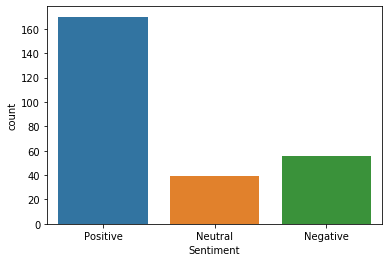

In [80]:
sns.countplot(data_twitter.Sentiment,data=data_twitter)

### LDA

Using LDA to attach a column <b> Topic </b> to the output data. This would sumarize the complete essence of each document in one topic

In [89]:
from sklearn.decomposition import LatentDirichletAllocation


In [90]:
lda=LatentDirichletAllocation(n_components=10,random_state=47)

In [93]:
lda_model=lda.fit(tfif_model)

In [95]:
lda.components_

array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.10000736, 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       ...,
       [0.1       , 0.1       , 0.1       , ..., 0.63196149, 0.1       ,
        0.1       ],
       [0.40858113, 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.37386089, 0.1       , 0.42561391, ..., 0.57834633, 0.1       ,
        0.1       ]])

In [97]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfid.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['new', 'rt', 'it', 'the', 'time', 'draintheswamp', 'ralli', 'maga', 'back', 'watch', 'live', 'join', 'get', 'ohio', 'thank']


THE TOP 15 WORDS FOR TOPIC #1
['peopl', 'ac', 'will', 'colorado', 'vote', 'and', 'work', 'clinton', 'email', 'today', 'we', 'america', 'again', 'make', 'great']


THE TOP 15 WORDS FOR TOPIC #2
['support', 'think', 'thank', 'watch', 'cover', 'the', 'north', 'carolina', 'israel', 'dead', 'castro', 'fidel', 'night', 'it', 'would']


THE TOP 15 WORDS FOR TOPIC #3
['univers', 'would', 'countri', 'nytim', 'thank', 'draintheswamp', 'unit', 'clinton', 'today', 'drudgereport', 'wsj', 'presid', 'the', 'state', 'win']


THE TOP 15 WORDS FOR TOPIC #4
['tomorrow', 'miami', 'much', 'draintheswamp', 'win', 'mani', 'we', 'iowa', 'day', 'florida', 'let', 'us', 'thank', 'great', 'go']


THE TOP 15 WORDS FOR TOPIC #5
['rt', 'us', 'danscavino', 'grand', 'live', 'call', 'wilmington', 'state', 'watch', 'thank', 'the', 'michigan', 'win', 'join', 'ohio']

In [99]:
topics_op=lda.transform(tfif_model)

In [100]:
data_twitter['Topics']=topics_op.argmax(axis=1)

In [103]:
data_twitter.head(10)

,Tweet_data,Class,Tokenized,Clean_Data,Stemmed,Pos,NER tags,Sentiment,Topics
0,"If the press would cover me accurately & honorably, I would have far less reason to ""tweet."" Sad...",Yes,"[If, the, press, would, cover, me, accurately, &, honorably, ,, I, would, have, far, less, reaso...","[If, press, would, cover, accurately, honorably, I, would, far, less, reason, tweet, Sadly, I, d...",if press would cover accur honor i would far less reason tweet sad i dont know ever happen,"[If, SCONJ, the, DET, press, NOUN, would, VERB, cover, VERB, me, PRON, accurately, ADV, &, CCONJ...",[],Positive,2
1,I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing an...,Yes,"[I, am, thrilled, to, nominate, Dr., @, RealBenCarson, as, our, next, Secretary, of, the, US, De...","[I, thrilled, nominate, Dr, RealBenCarson, next, Secretary, US, Dept, Housing, Urban, Developmen...",i thrill nomin dr realbencarson next secretari us dept hous urban develop httpstcoojkudfhp3r,"[I, PRON, am, AUX, thrilled, VERB, to, PART, nominate, VERB, Dr., PROPN, @RealBenCarson, PROPN, ...","[@RealBenCarson, 30, 44, PERSON, the US Dept. of Housing and Urban Development, 70, 115, ORG]",Positive,8
2,their country (the U.S. doesn't tax them) or to build a massive military complex in the middle o...,Yes,"[their, country, (, the, U.S., does, n't, tax, them, ), or, to, build, a, massive, military, com...","[country, US, doesnt, tax, build, massive, military, complex, middle, South, China, Sea, I, dont...",countri us doesnt tax build massiv militari complex middl south china sea i dont think,"[their, DET, country, NOUN, (, PUNCT, the, DET, U.S., PROPN, does, AUX, n't, PART, tax, VERB, th...","[U.S., 19, 23, GPE, the South China Sea, 98, 117, LOC]",Neutral,2
3,Did China ask us if it was OK to devalue their currency (making it hard for our companies to com...,Yes,"[Did, China, ask, us, if, it, was, OK, to, devalue, their, currency, (, making, it, hard, for, o...","[Did, China, ask, us, OK, devalue, currency, making, hard, companies, compete, heavily, tax, pro...",did china ask us ok devalu currenc make hard compani compet heavili tax product go,"[Did, AUX, China, PROPN, ask, VERB, us, PRON, if, SCONJ, it, PRON, was, AUX, OK, ADJ, to, PART, ...","[China, 4, 9, GPE]",Positive,7
4,".@FoxNews will be re-running ""Objectified: Donald Trump,"" the ratings hit produced by the great ...",Yes,"[., @, FoxNews, will, be, re-running, ``, Objectified, :, Donald, Trump, ,, '', the, ratings, hi...","[FoxNews, rerunning, Objectified, Donald, Trump, ratings, hit, produced, great, Harvey, Levin, T...",foxnew rerun objectifi donald trump rate hit produc great harvey levin tmz 800 pm enjoy,"[.@FoxNews, PROPN, will, VERB, be, AUX, re, VERB, -, VERB, running, VERB, "", PUNCT, Objectified,...","[Objectified:, 30, 42, WORK_OF_ART, Donald Trump, 43, 55, PERSON, 8:00 P.M., 120, 129, TIME, Enj...",Positive,8
5,The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin r...,Yes,"[The, Green, Party, just, dropped, its, recount, suit, in, Pennsylvania, and, is, losing, votes,...","[The, Green, Party, dropped, recount, suit, Pennsylvania, losing, votes, Wisconsin, recount, Jus...",the green parti drop recount suit pennsylvania lose vote wisconsin recount just stein scam rais ...,"[The, DET, Green, PROPN, Party, PROPN, just, ADV, dropped, VERB, its, DET, recount, NOUN, suit, ...","[The Green Party, 0, 15, ORG, Pennsylvania, 49, 61, GPE, Wisconsin, 85, 94, GPE, Stein, 111, 116...",Negative,1
6,expensive mistake! THE UNITED STATES IS OPEN FOR BUSINESS,Yes,"[expensive, mistake, !, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]","[expensive, mistake, THE, UNITED, STATES, IS, OPEN, FOR, BUSINESS]",expens mistak the unit state is open for busi,"[expensive, ADJ, mistake, NOUN, !, PUNCT, THE, DET, UNITED, PROPN, STATES, PROPN, IS, VERB, OPEN...","[THE UNITED STATES IS, 19, 39, GPE]",Positive,2
7,"these companies are able to move between all 50 s

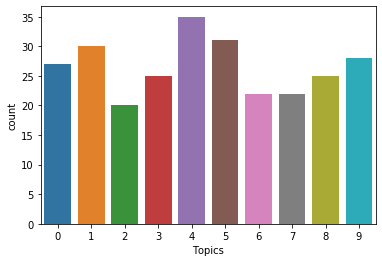

In [104]:
sns.countplot(data_twitter.Topics,data=data_twitter)